In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [2]:
filename = 'P:/CoxaAI/preprocess_data/csv_detection_info/sortering 2/BB.csv'
filename_clean = 'P:/CoxaAI/preprocess_data/csv_detection_info_clean/sortering 2/BB.csv'
saved_cropped_image = 'P:/CoxaAI/preprocess_data/cropped/sortering 2/BB'

In [3]:
detection_df = pd.read_csv(filename)

In [4]:
detection_df

base_path  \
0    P:/CoxaAI/Sortering 2/BB   
1    P:/CoxaAI/Sortering 2/BB   
2    P:/CoxaAI/Sortering 2/BB   
3    P:/CoxaAI/Sortering 2/BB   
4    P:/CoxaAI/Sortering 2/BB   
..                        ...   
199  P:/CoxaAI/Sortering 2/BB   
200  P:/CoxaAI/Sortering 2/BB   
201  P:/CoxaAI/Sortering 2/BB   
202  P:/CoxaAI/Sortering 2/BB   
203  P:/CoxaAI/Sortering 2/BB   

                                              filename parent_name  \
0    1.3.51.0.7.12628446692.17076.9027.43213.29613....  1-23002909   
1    1.3.51.0.7.12628446692.17076.9027.43213.29613....  1-23002909   
2     1.2.276.0.95.15181.1.20230306.121552.0.2.105.dcm  1-23002917   
3     1.2.276.0.95.15181.1.20230306.121552.0.2.105.dcm  1-23002917   
4     1.2.276.0.95.15181.1.20230306.121635.0.2.106.dcm  1-23002917   
..                                                 ...         ...   
199  1.2.392.200036.9125.9.0.2820906742.1057497776....  1-23006140   
200  1.2.276.0.95.29487.1.20230118.103434.0.2.15442...  1-23006165   
201  1.2.276.0.95.29487.1.20230118.103434.0.2.15442...  1-23006165   
202  1.2.276.0.95.29487.1.20230118.103541.0.2.15441...  1-23006165   
203  1.2.276.0.95.29487.1.20230118.103541.0.2.15441...  1-23006165   

                                             crop_name  ax0_min  ax0_max  \
0    1.3.51.0.7.12628446692.17076.9027.43213.29613....     1082     1269   
1    1.3.51.0.7.12628446692.17076.9027.43213.29613....     1077     1267   
2    1.2.276.0.95.15181.1.20230306.121552.0.2.105.d...     1062     1246   
3    1.2.276.0.95.15181.1.20230306.121552.0.2.105.d...     1057     1247   
4    1.2.276.0.95.15181.1.20230306.121635.0.2.106.d...     1074     1268   
..                                                 ...      ...      ...   
199  1.2.392.200036.9125.9.0.2820906742.1057497776....     1377     1673   
200  1.2.276.0.95.29487.1.20230118.103434.0.2.15442...      966     1140   
201  1.2.276.0.95.29487.1.20230118.103434.0.2.15442...      968     1158   
202  1.2.276.0.95.29487.1.20230118.103541.0.2.15441...      954     1142   
203  1.2.276.0.95.29487.1.20230118.103541.0.2.15441...      943     1136   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  
0        557      695    0.985946       False          1            BB  
1       1234     1373    0.965548       False          1            BB  
2        893     1025    0.996085       False          1            BB  
3       1546     1683    0.976188       False          1            BB  
4        879     1018    0.984377       False          1            BB  
..       ...      ...         ...         ...        ...           ...  
199      839     1052    0.864512       False          1            BB  
200      486      616    0.959559       False          1            BB  
201     1098     1237    0.955140       False          1            BB  
202     1100     1242    0.975879       False          1            BB  
203      480      620    0.935024       False          1            BB  

[204 rows x 12 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [5]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [6]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([], dtype='int64')

Note that there is no case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [7]:
# plot every 9 of them

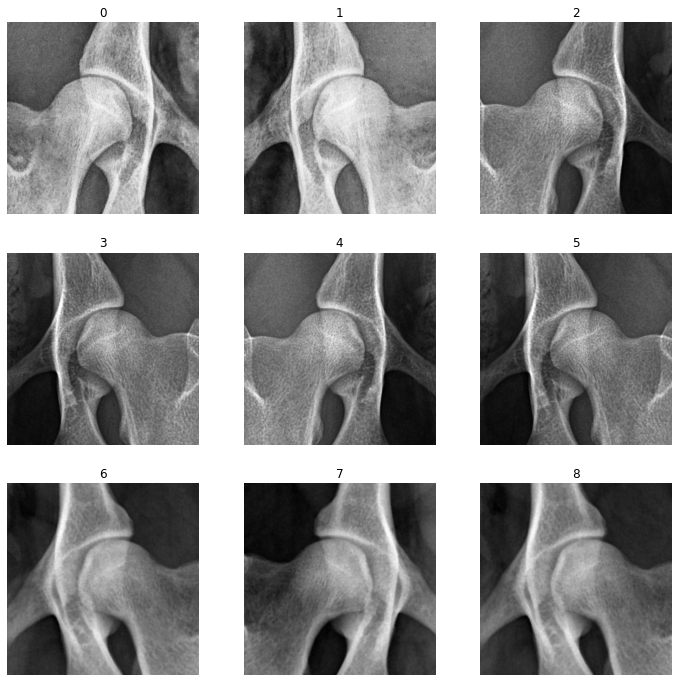

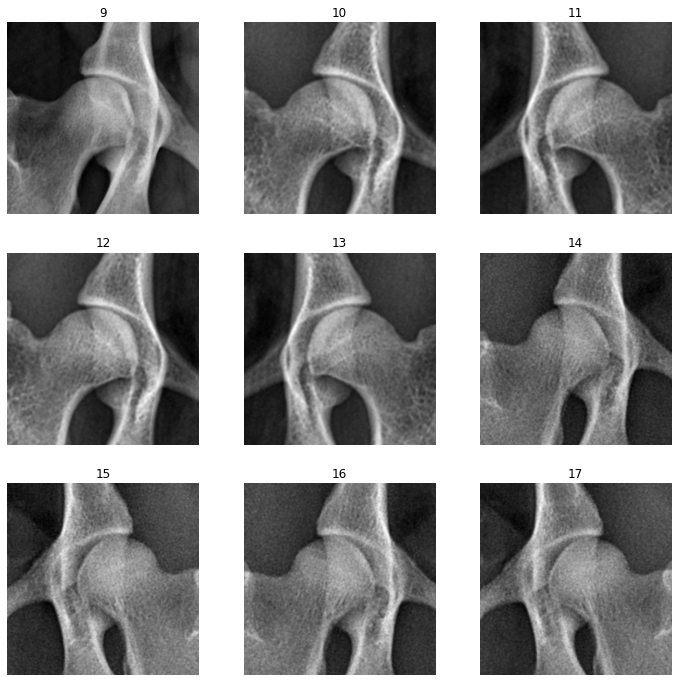

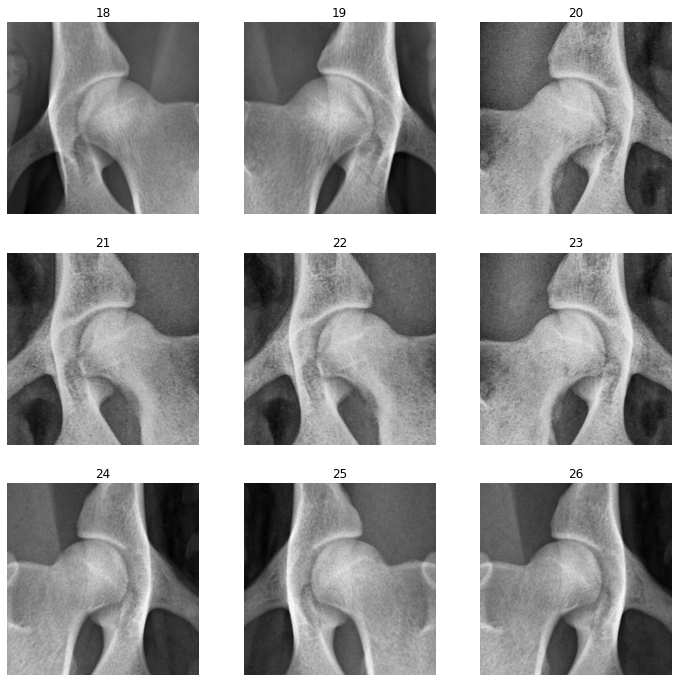

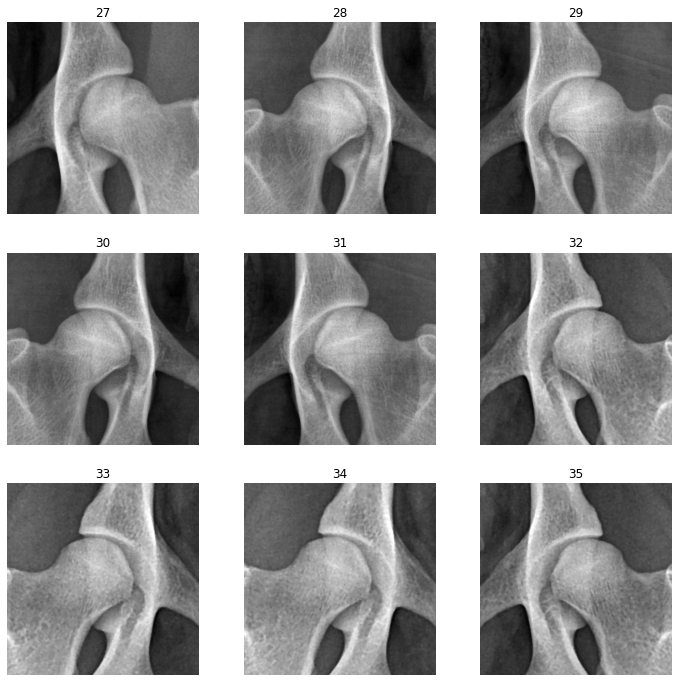

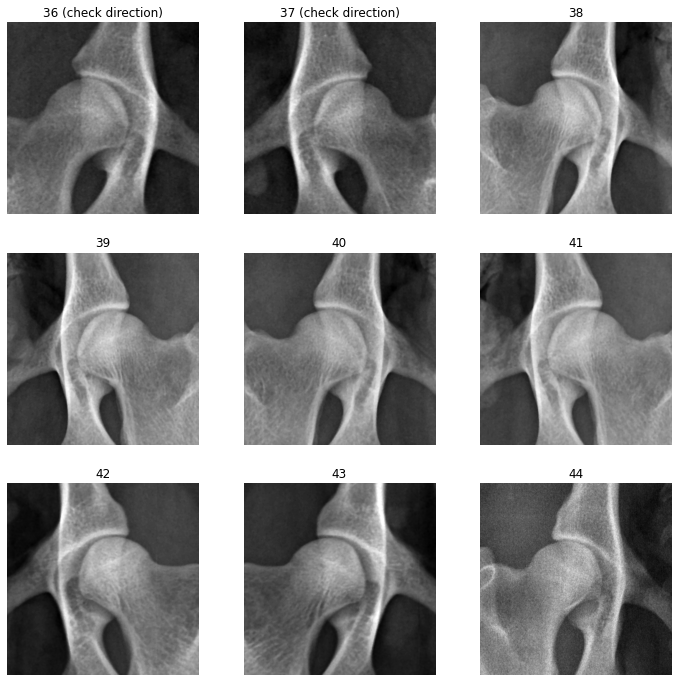

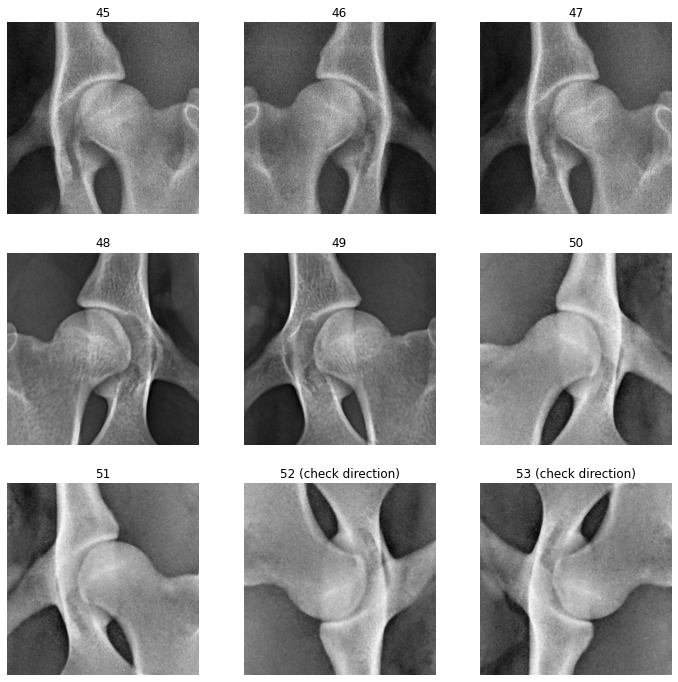

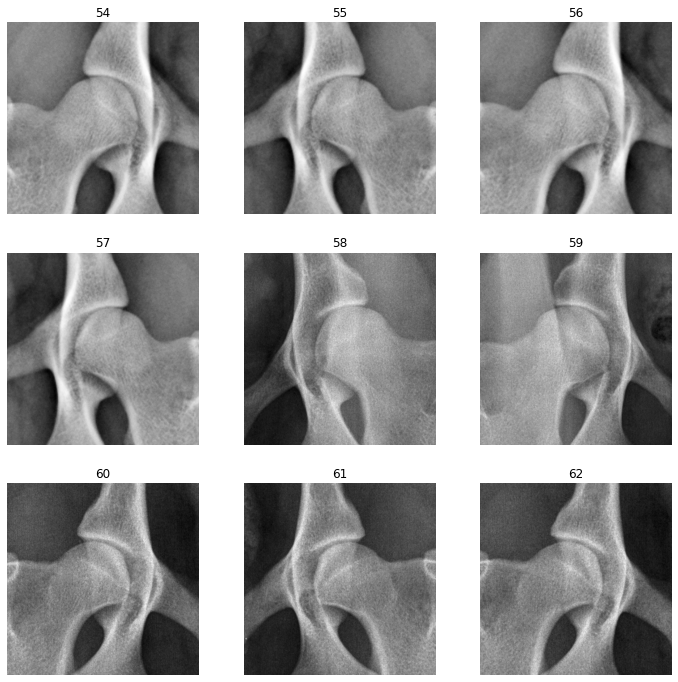

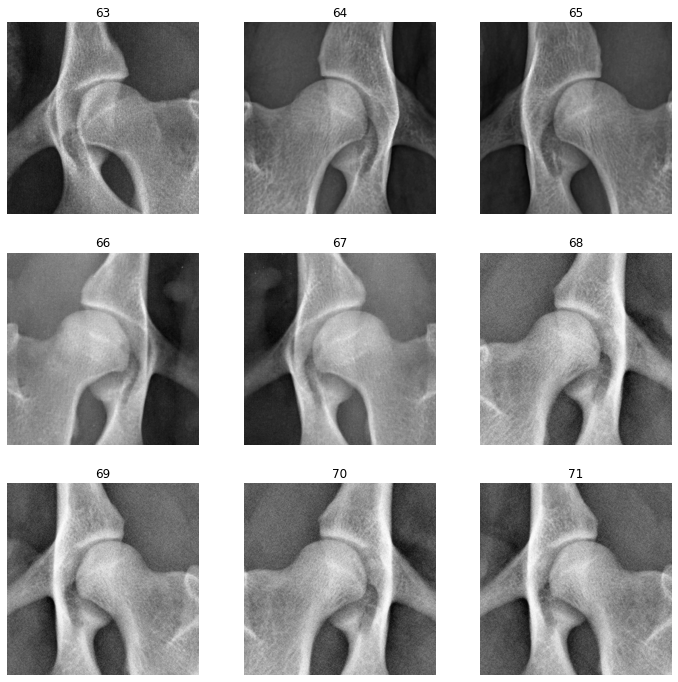

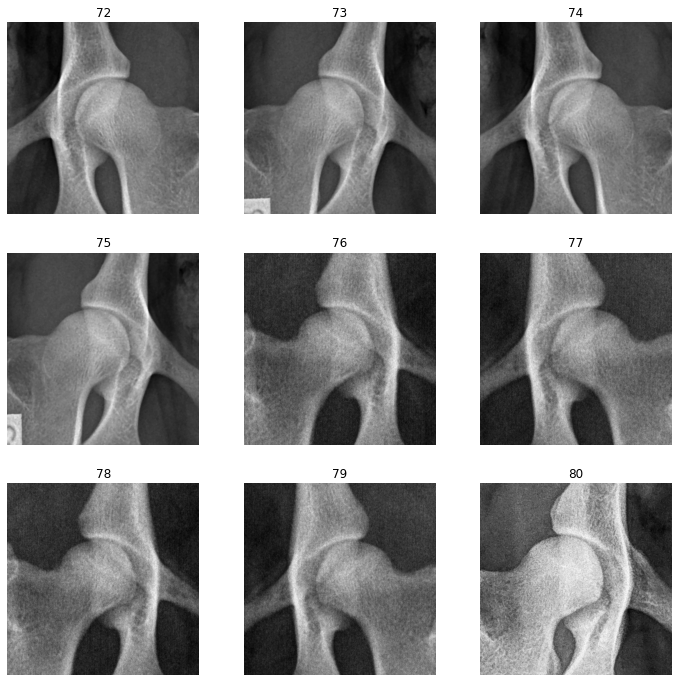

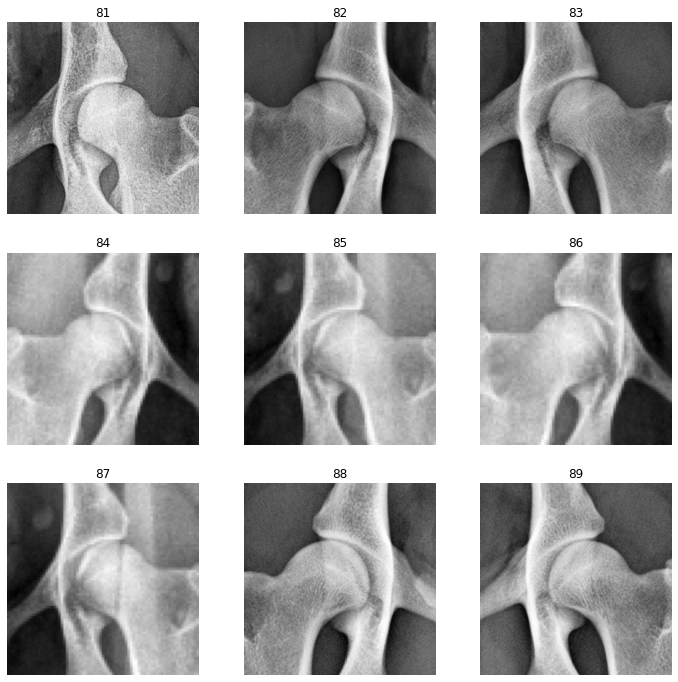

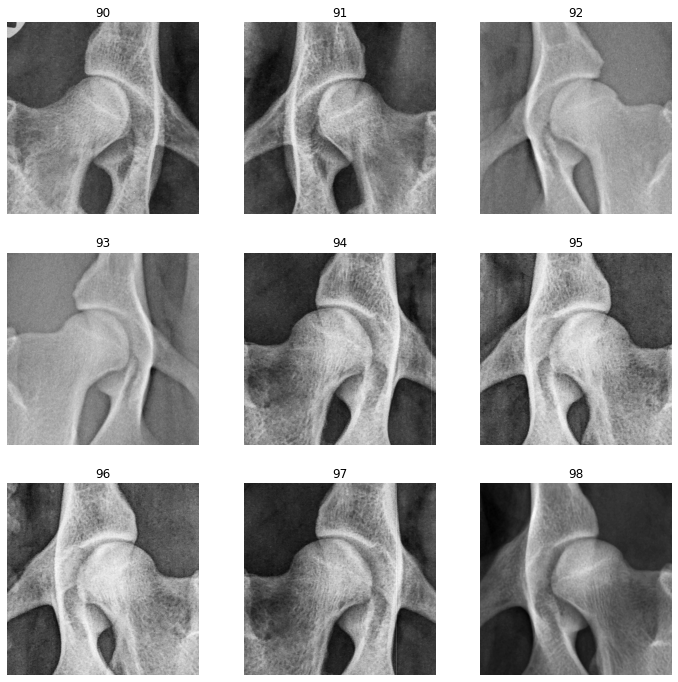

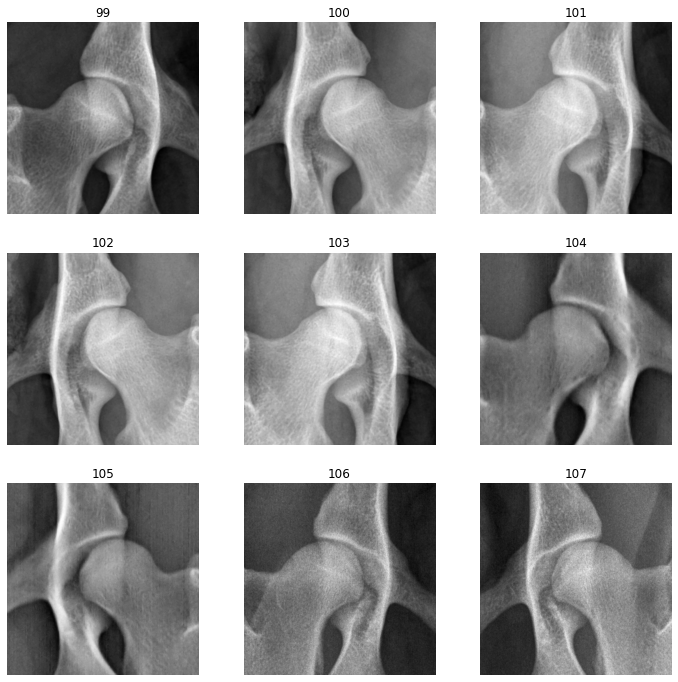

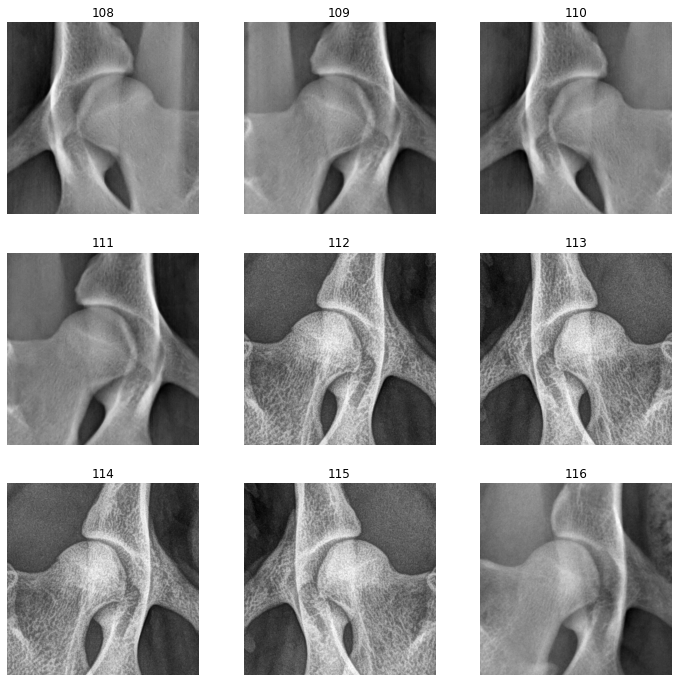

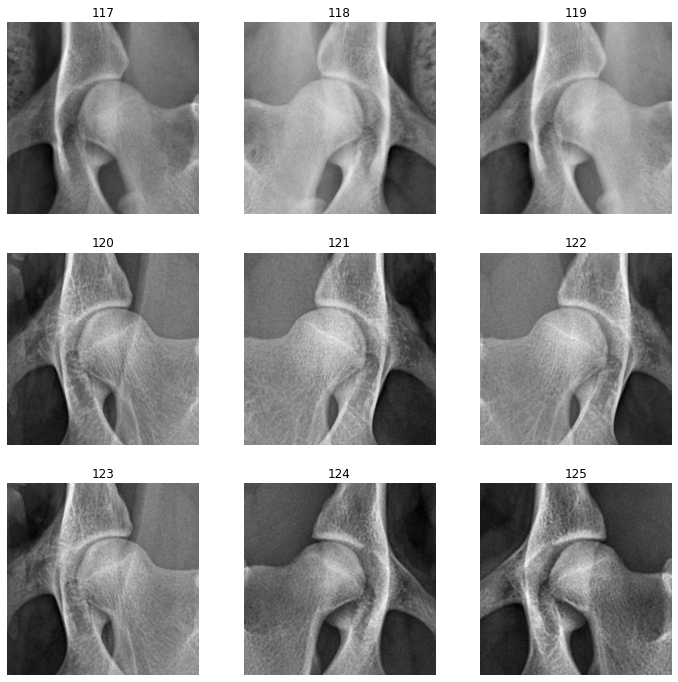

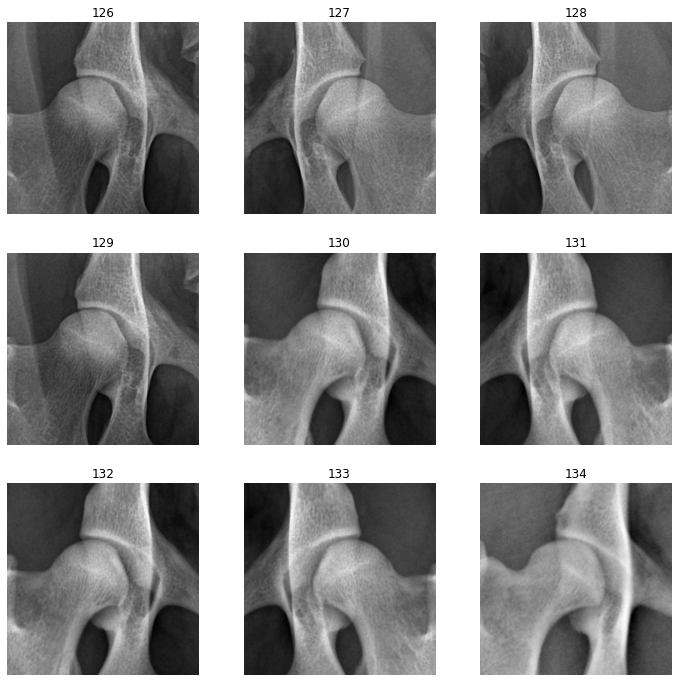

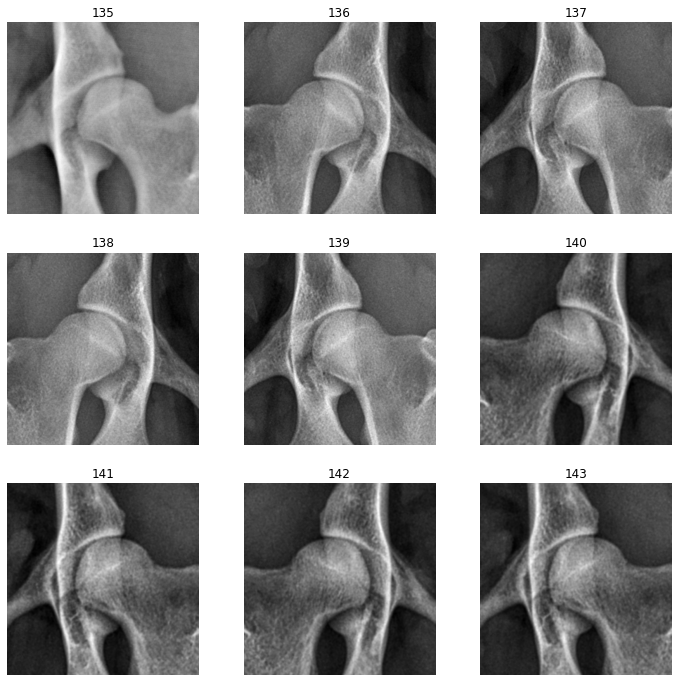

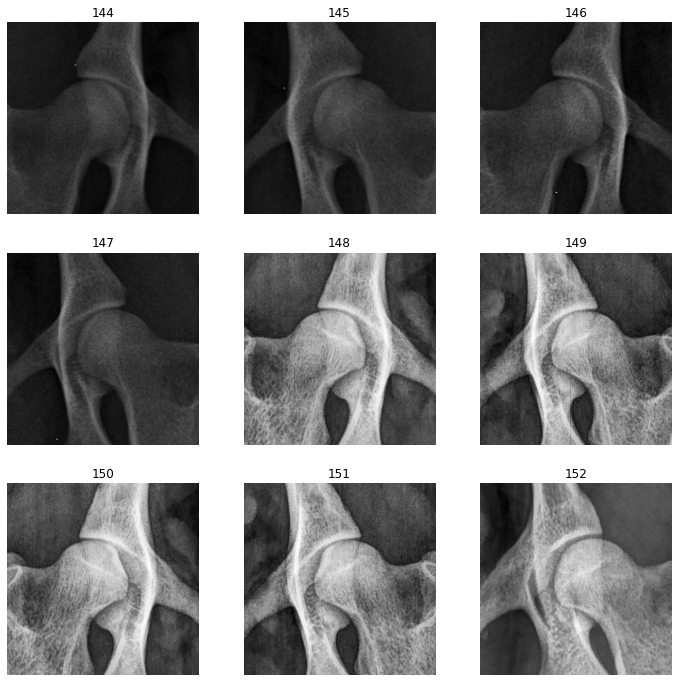

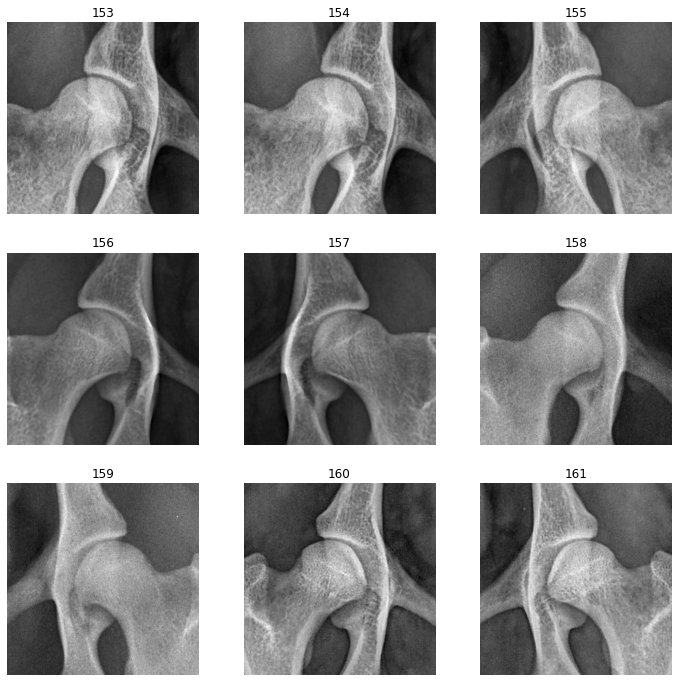

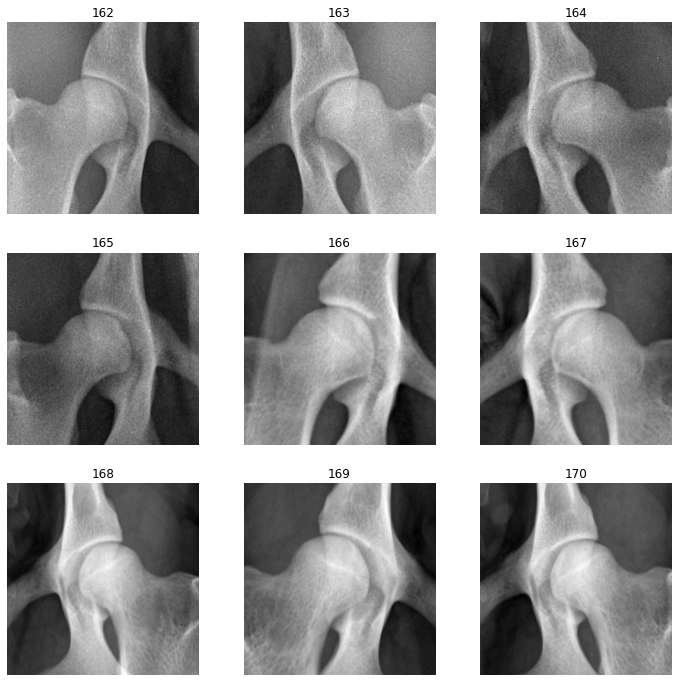

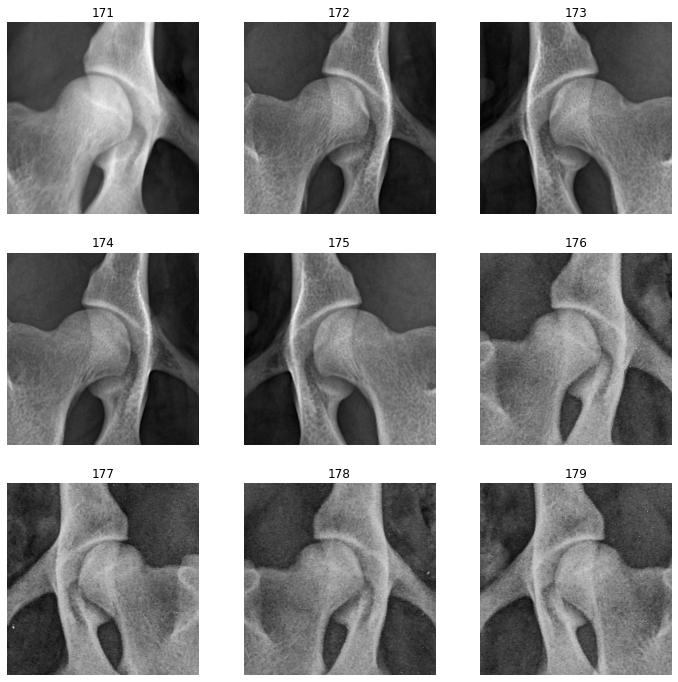

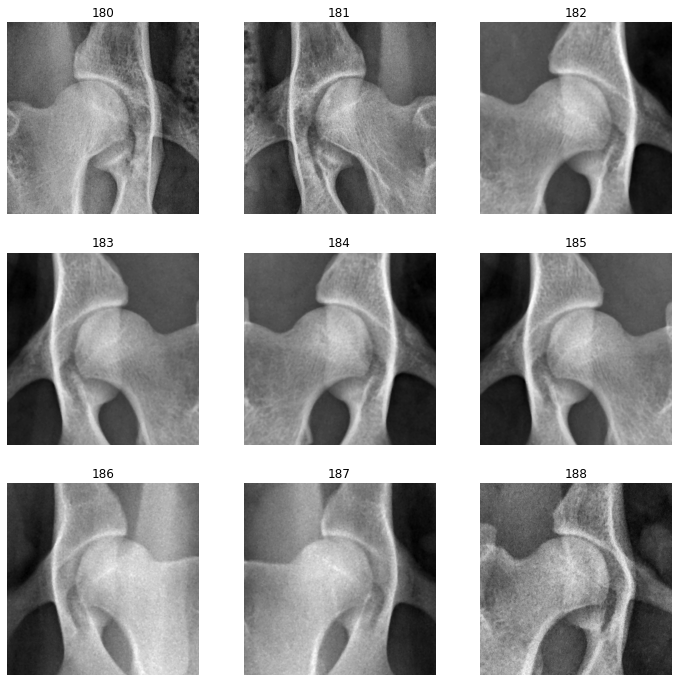

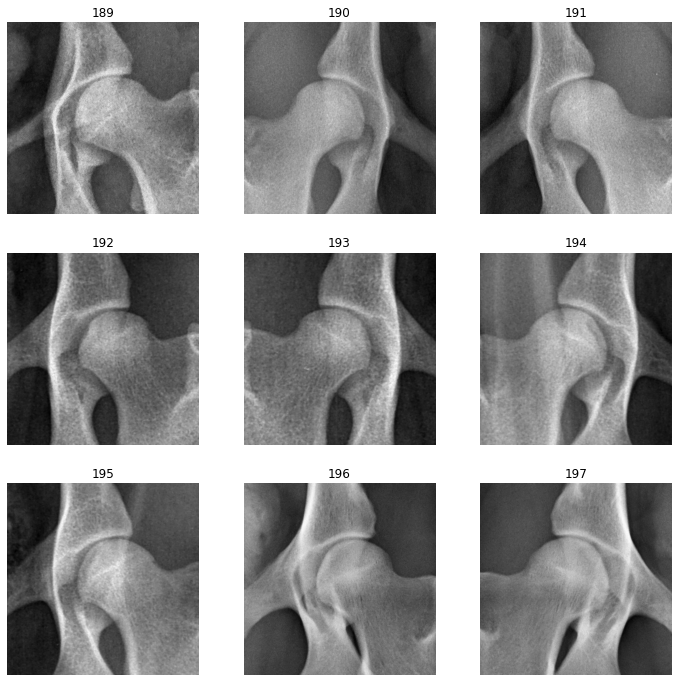

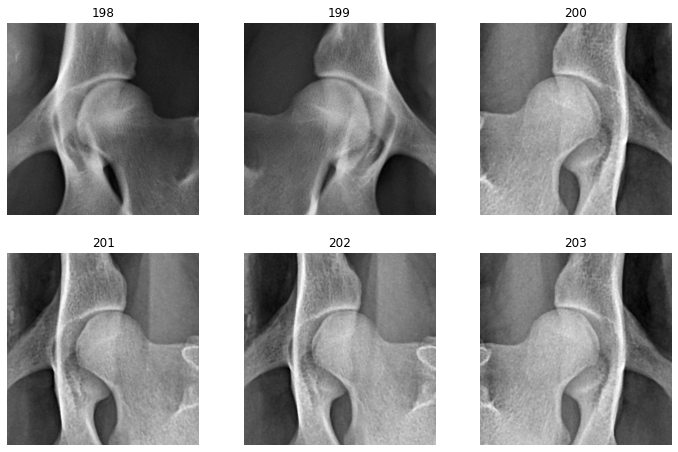

In [8]:
for id, item in detection_df.iterrows():
    fn = item['crop_name']
    img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    suffix = ' (check direction)' if item['is_rotated'] else ''
#     parent = item['parent_name']
#     if not pd.isnull(parent):
#         img = np.load(os.path.join(saved_cropped_image, parent,fn + '.npy'))
#     else:
#         img = np.load(os.path.join(saved_cropped_image,fn + '.npy'))
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id)+suffix)

    if (id%9) == 8:
        plt.show()                    
        
plt.show()

## Assign "flipped" column before removing failed predictions

In [9]:
flipped = np.array([False] * detection_df.shape[0])
flipped_indice = [52, 53]
flipped[detection_df.index.isin(flipped_indice)] = True
detection_df['flipped'] = flipped

## Remove bad detection items

In [10]:
remove_indice = []
detection_df[~detection_df.index.isin(remove_indice)]

base_path  \
0    P:/CoxaAI/Sortering 2/BB   
1    P:/CoxaAI/Sortering 2/BB   
2    P:/CoxaAI/Sortering 2/BB   
3    P:/CoxaAI/Sortering 2/BB   
4    P:/CoxaAI/Sortering 2/BB   
..                        ...   
199  P:/CoxaAI/Sortering 2/BB   
200  P:/CoxaAI/Sortering 2/BB   
201  P:/CoxaAI/Sortering 2/BB   
202  P:/CoxaAI/Sortering 2/BB   
203  P:/CoxaAI/Sortering 2/BB   

                                              filename parent_name  \
0    1.3.51.0.7.12628446692.17076.9027.43213.29613....  1-23002909   
1    1.3.51.0.7.12628446692.17076.9027.43213.29613....  1-23002909   
2     1.2.276.0.95.15181.1.20230306.121552.0.2.105.dcm  1-23002917   
3     1.2.276.0.95.15181.1.20230306.121552.0.2.105.dcm  1-23002917   
4     1.2.276.0.95.15181.1.20230306.121635.0.2.106.dcm  1-23002917   
..                                                 ...         ...   
199  1.2.392.200036.9125.9.0.2820906742.1057497776....  1-23006140   
200  1.2.276.0.95.29487.1.20230118.103434.0.2.15442...  1-23006165   
201  1.2.276.0.95.29487.1.20230118.103434.0.2.15442...  1-23006165   
202  1.2.276.0.95.29487.1.20230118.103541.0.2.15441...  1-23006165   
203  1.2.276.0.95.29487.1.20230118.103541.0.2.15441...  1-23006165   

                                             crop_name  ax0_min  ax0_max  \
0    1.3.51.0.7.12628446692.17076.9027.43213.29613....     1082     1269   
1    1.3.51.0.7.12628446692.17076.9027.43213.29613....     1077     1267   
2    1.2.276.0.95.15181.1.20230306.121552.0.2.105.d...     1062     1246   
3    1.2.276.0.95.15181.1.20230306.121552.0.2.105.d...     1057     1247   
4    1.2.276.0.95.15181.1.20230306.121635.0.2.106.d...     1074     1268   
..                                                 ...      ...      ...   
199  1.2.392.200036.9125.9.0.2820906742.1057497776....     1377     1673   
200  1.2.276.0.95.29487.1.20230118.103434.0.2.15442...      966     1140   
201  1.2.276.0.95.29487.1.20230118.103434.0.2.15442...      968     1158   
202  1.2.276.0.95.29487.1.20230118.103541.0.2.15441...      954     1142   
203  1.2.276.0.95.29487.1.20230118.103541.0.2.15441...      943     1136   

     ax1_min  ax1_max  confidence  is_rotated  diagnosis diagnosis_raw  \
0        557      695    0.985946       False          1            BB   
1       1234     1373    0.965548       False          1            BB   
2        893     1025    0.996085       False          1            BB   
3       1546     1683    0.976188       False          1            BB   
4        879     1018    0.984377       False          1            BB   
..       ...      ...         ...         ...        ...           ...   
199      839     1052    0.864512       False          1            BB   
200      486      616    0.959559       False          1            BB   
201     1098     1237    0.955140       False          1            BB   
202     1100     1242    0.975879       False          1            BB   
203      480      620    0.935024       False          1            BB   

     flipped  
0      False  
1      False  
2      False  
3      False  
4      False  
..       ...  
199    False  
200    False  
201    False  
202    False  
203    False  

[204 rows x 13 columns]

In [11]:
new_detection_df = detection_df[~detection_df.index.isin(remove_indice)]

In [12]:
new_detection_df.shape

(204, 13)

In [13]:
exclude_ids = pd.read_csv('exclude_id.csv').id.values
new_detection_df = new_detection_df[~new_detection_df.parent_name.isin(exclude_ids)]
print(new_detection_df.shape)

(204, 13)


In [14]:
new_detection_df.to_csv(filename_clean, index=False)

In [15]:
detection_df[detection_df.index.isin(remove_indice)]

Empty DataFrame
Columns: [base_path, filename, parent_name, crop_name, ax0_min, ax0_max, ax1_min, ax1_max, confidence, is_rotated, diagnosis, diagnosis_raw, flipped]
Index: []